In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LogisticRegression
import seaborn as sns


In [42]:
train = pd.read_csv('titanic_train.csv')
train.head()
test = pd.read_csv('titanic_test.csv')

<AxesSubplot:>

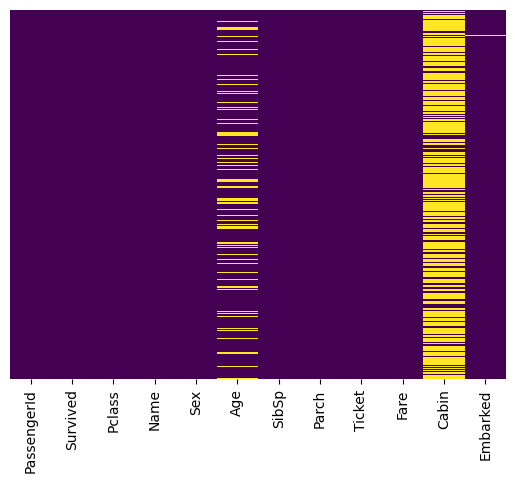

In [6]:
sns.heatmap(train.isnull(), yticklabels= False, cbar=False, cmap='viridis')

In [7]:
sns.set_style('whitegrid')

<AxesSubplot:xlabel='Survived', ylabel='count'>

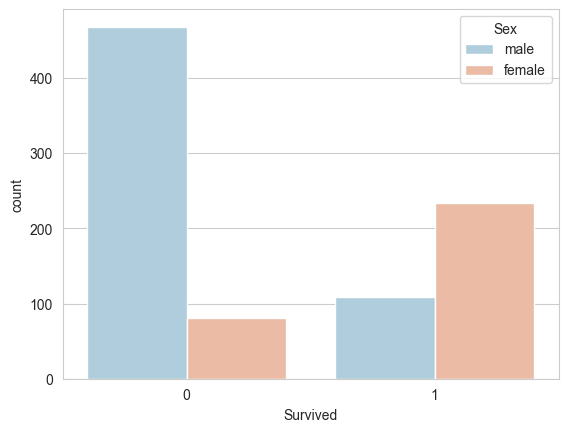

In [12]:
sns.countplot(x='Survived', hue='Sex',data=train, palette='RdBu_r')

<AxesSubplot:xlabel='Survived', ylabel='count'>

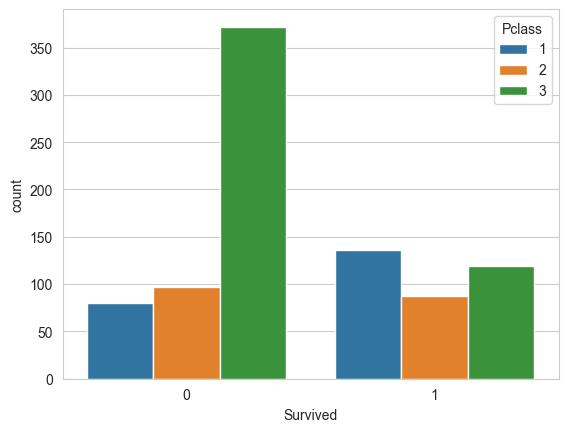

In [13]:
sns.countplot(x='Survived', hue='Pclass',data=train)

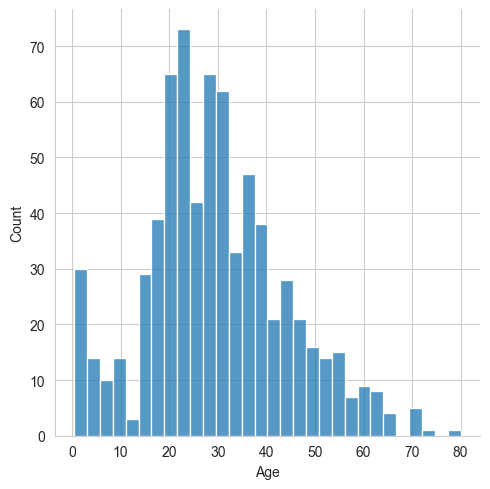

In [14]:
sns.displot(train['Age'].dropna(), kde=False, bins = 30)

In [15]:
train['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

<AxesSubplot:xlabel='SibSp', ylabel='count'>

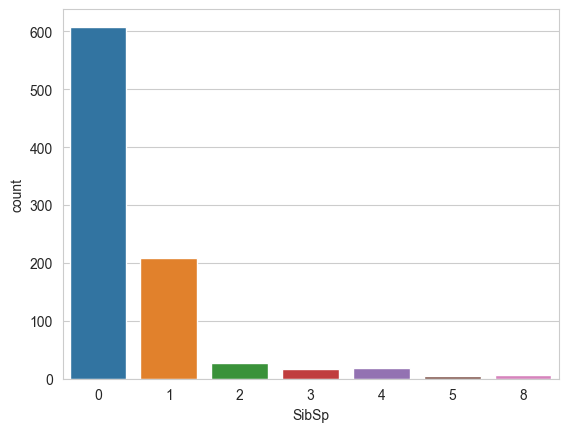

In [16]:
sns.countplot(x='SibSp', data=train)

<AxesSubplot:>

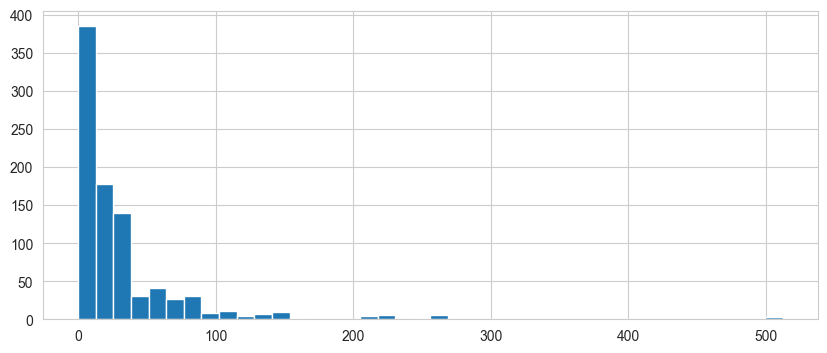

In [18]:
train['Fare'].hist(bins=40, figsize=(10,4))

In [19]:
import cufflinks as cf

In [20]:
cf.go_offline()
train['Fare'].iplot(kind='hist', bins = 40)

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

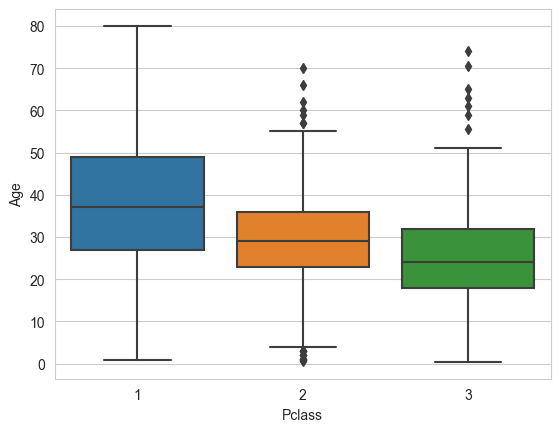

In [21]:
sns.boxplot(x='Pclass', y='Age', data=train)

In [22]:
def impute_age(cols):

    Age = cols[0]
    Pclass = cols[1]

    if pd.isnull(Age):

        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age

In [43]:
train['Age'] = train[['Age', 'Pclass']].apply(impute_age, axis = 1)
test['Age'] = test[['Age', 'Pclass']].apply(impute_age, axis = 1)

<AxesSubplot:>

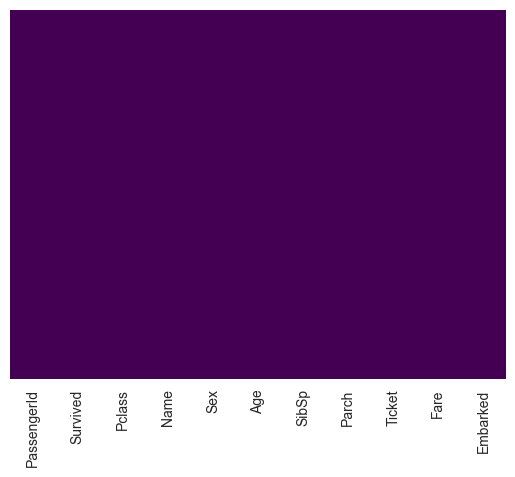

In [28]:
sns.heatmap(train.isnull(),yticklabels=False, cbar=False, cmap ='viridis')

In [44]:
train.drop('Cabin', axis = 1, inplace = True)
test.drop('Cabin', axis = 1, inplace = True)

In [45]:
train.dropna(inplace = True)
test.dropna(inplace = True)

In [46]:
sex = pd.get_dummies(train['Sex'], drop_first=True)
sex2 = pd.get_dummies(test['Sex'], drop_first=True)

In [47]:
embark = pd.get_dummies(train['Embarked'], drop_first = True)
embark2 = pd.get_dummies(test['Embarked'], drop_first = True)

In [32]:
embark.head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [48]:
train = pd.concat([train,sex,embark], axis= 1)
test = pd.concat([test,sex2,embark2], axis= 1)
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1


In [49]:
train.drop(['Sex', 'Embarked', 'Name', 'Ticket'], inplace = True , axis = 1)
test.drop(['Sex', 'Embarked', 'Name', 'Ticket'], inplace = True , axis = 1)

In [38]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1,1,0,1


In [50]:
train.drop('PassengerId', axis = 1, inplace = True)
test.drop('PassengerId', axis = 1, inplace = True)

In [41]:
train.head(
    
)

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1,1,0,1


In [61]:
X = train.drop('Survived', axis = 1)
y = train['Survived']

from sklearn.model_selection import train_test_split

In [64]:
test.head()

,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,3,34.5,0,0,7.8292,1,1,0
1,3,47.0,1,0,7.0000,0,0,1
2,2,62.0,0,0,9.6875,1,1,0
3,3,27.0,0,0,8.6625,1,0,1
4,3,22.0,1,1,12.2875,0,0,1


In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [53]:
logm = LogisticRegression()

In [54]:
logm.fit(X_train, y_train)

C:\Users\Rayni\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

In [55]:
pred = logm.predict(X_test)

In [56]:
from sklearn.metrics import classification_report

In [57]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.83      0.90      0.86       163
           1       0.82      0.71      0.76       104

    accuracy                           0.83       267
   macro avg       0.83      0.81      0.81       267
weighted avg       0.83      0.83      0.83       267



In [58]:
from sklearn.metrics import confusion_matrix

In [59]:
confusion_matrix(y_test, pred)

array([[147,  16],
       [ 30,  74]], dtype=int64)